# Центральная предельная теорема своими руками

Будем работать с бета-распределением распределением.  
Фукнция распределения для данного распределения:  

$$f_X(x) = \frac{1}{B(\alpha, \beta)}x^{\alpha - 1}(1 - x)^{\beta - 1}$$  
$\alpha, \beta$ -  произвольные фиксированные параметры, и  
$B(\alpha, \beta) = \int\limits_0^1x^{\alpha - 1}(1 - x)^{\beta - 1}dx$ - бета-функция   
Тогда случайная величина X имеет бета-распределение. Пишут: X$\sim B(\alpha, \beta)$  
Рассмотрим ситуацию, когда $\alpha = 5, \beta = 1$

### Моменты

Математическое ожидание и дисперсия случайной величины X, имеющей бета-распределение, имеют вид:  
$\mathbb{E}[X]=\frac {\alpha }{\alpha +\beta } = \frac{5}{6}$  
$\mathrm {D}[X]=\frac {\alpha \beta }{(\alpha +\beta )^{2}(\alpha +\beta +1)} = \frac{5}{36\cdot 7} = \frac{5}{252}$  

Нормальное распределение: $N(\mu = \mathbb{E}[X], \sigma^2 = \frac{\mathrm {D}[X]}{n})$  
Тогда параметры нормального распр-я равны $\mu = \frac{5}{6}, \sigma^2 = \frac{5}{252\cdot n}$

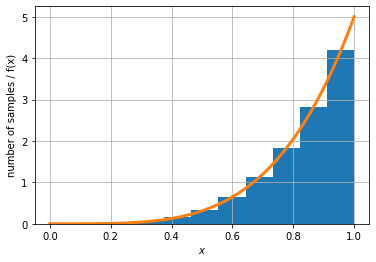

In [106]:
# Библиотеки
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

distribution_values = sts.beta(5, 1)
sample = distribution_values.rvs(size=100000) # Задаем выборку нормального распределения объемом 1000

# Печатаем график гистограммы распределения
plt.hist(sample, density=True) # Задаем гистограмму
plt.ylabel('number of samples / f(x)') # Подписываем ось х
plt.xlabel('$x$') # Подписываем ось у

# Печатаем график плотности вероятности на экран
# По правилу 3х сигм, 99.7% значений лежит на отрезке [0.41, 1.313]
# Чтобы захватить 100%, возьмем отрезок [0, 1]
# т.к. значения больше 1 не достигаются(из-за пределов интегрирования)
# Делим промежуток [0, 1] на 1000 точек(размер нашей выборки)
x = np.linspace(0, 1, 1000) 
# Рассчитаем теоритеческую плотность вероятности
# pdf - probability density function
pdf = distribution_values.pdf(x) 
plt.plot(x, pdf, linewidth=3) 
plt.grid() # Включим сетку
plt.show()

Вывод: теоритическая плотность вероятности совпадает с гистограммой выборки

### Оценим распределение выборочного среднего вашей случайной величины при разных объёмах выборок

Выборочное среднее $\bar X = \frac{1}{n}\sum\limits_{i = 1}^n X_i$  
По центральной предельной теореме выборочное среднее будет приближаться к нормальному распределнию при увелечении объема выборки n, т.е. к $N\left(\mu = \frac{5}{6}, \sigma^2= \frac{5}{252\cdot n}\right)$.

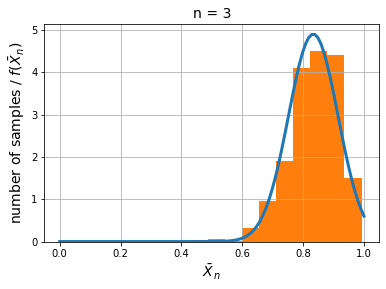

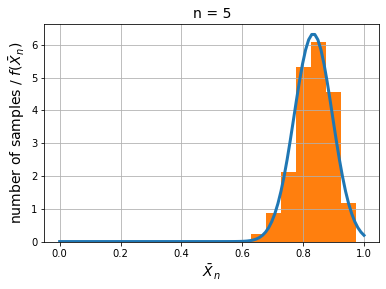

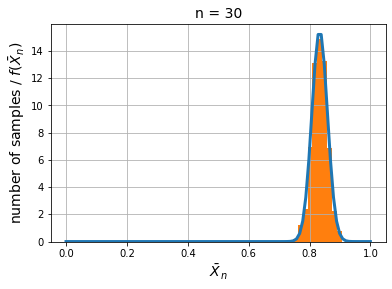

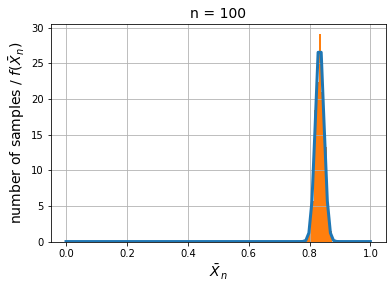

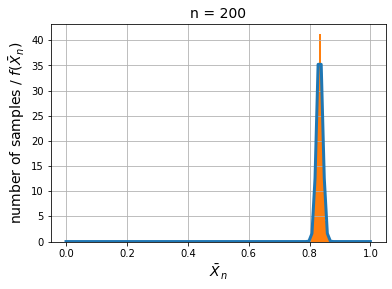

In [151]:
def generate(n):
    mu, sigma = 5/6, (5/(252 * n)) ** 0.5 # Начальные параметры
    vals = [np.mean(distribution_values.rvs(n)) for _ in range(1000)] # считаем выборочное среднее
    
    # Сделаем выборку из нормального распределения для посчета 
    # теоритеческой плотности вероятности с нашими mu и sigma
    norm_sample = sts.norm(mu, sigma)
    x = np.linspace(0, 1, 100)
    pdf = norm_sample.pdf(x)
    
    # Выводим на экран графики пл-ти вер-ти и гистограммы распределения
    plt.plot(x, pdf, linewidth=3)
    plt.hist(vals, density=True) 
    plt.title('n = {}'.format(n), size=14)
    plt.ylabel('number of samples / $f(\\bar X_n)$', size=14) # Подписываем ось х
    plt.xlabel('$\\bar X_n$', size=14) # Подписываем ось у
    plt.grid() # Включим сетку
    plt.show()
    

for val in [3, 5, 30, 100, 200]:
    generate(val)

Мы явно видим из граификов, что теорема выполняется для нашего распределения.